In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

In [178]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=50
L=n*T

N_grid=20000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

In [179]:
p=int(round(T/h))
p

st=200
fn=19799

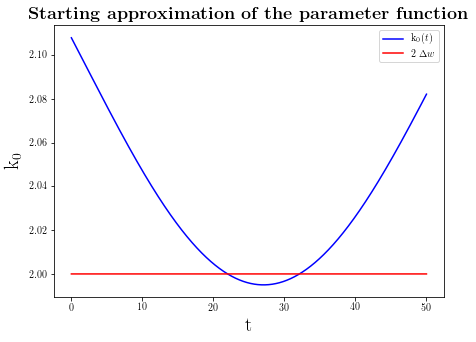

In [329]:
A=0.01*weight
m=0.2095*weight
B=W*0.01
eps=1.7


k0=A*np.cos(B*t+np.array([np.pi-eps]*N_grid))+np.array([m]*N_grid)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [330]:
k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

2.107845503864091 2.0953612219438913 2.0821311282247192


In [331]:
f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

2.0


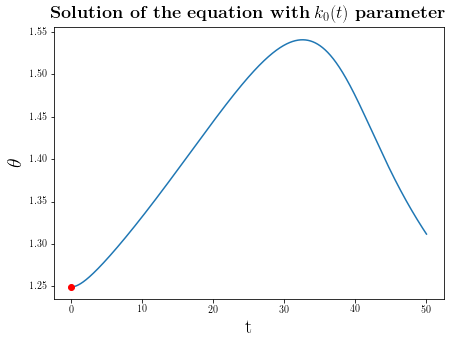

In [332]:
init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

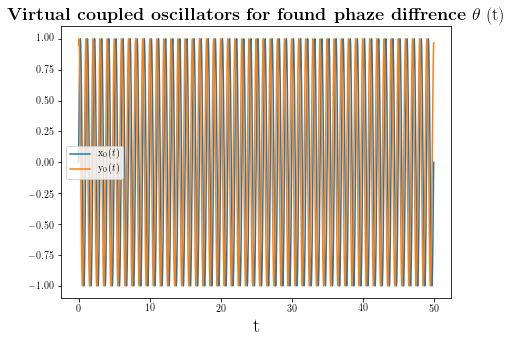

In [333]:
theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

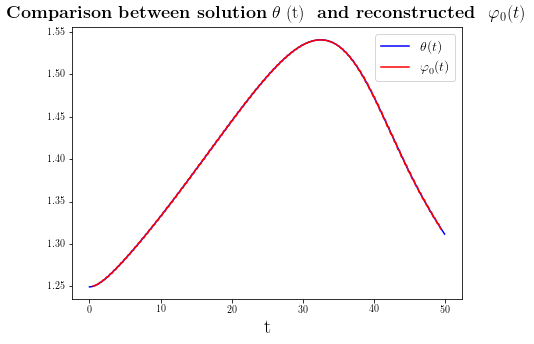

In [334]:
C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

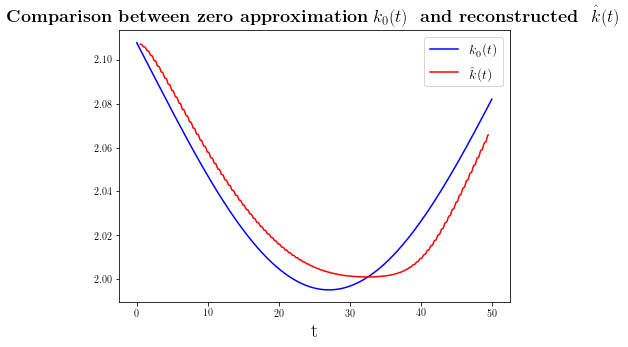

In [335]:
#dphi0=np.diff(phi0)/h
#dphi0[fn]=dphi0[fn-1]
#dphi0=np.append(dphi0, nan)

#k_hat=np.divide(np.array([2*dw]*N_grid)-dphi0, np.sin(phi0))

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

In [336]:
mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk

0.13845246072903358

In [337]:
np.mean(k_hat[st:fn])

2.0320591478065304

In [320]:
sk

0.067233547595447529